# Hands-on R: Vectorised Code

## The Problem

**Input**
A numeric vector (1:200000)

**Output**
A vector containing the even numbers in the input vector.

## Version 1 - for loop (dynamic memory allocation)

In [4]:
x <- 1:200000

for1 <- function(x) {
  ans <- c()
  for(i in x)
  {
    if(i%%2==0) { ans[i] = TRUE } else {
      ans[i] = FALSE }
  }
  return(x[ans])
}

time1 <- system.time(z <- for1(x))

## Version 2 - for loop (fixed-length vector)

In [5]:
x <- 1:200000

for2 <- function(x) {
  ans <- logical(length(x))

  for(i in x)
  {
    if(i%%2==0) { ans[i] = TRUE } else {
      ans[i] = FALSE }
  }
  return(x[ans])
}

time2 <- system.time(z <- for2(x))

## Version 3 - Vectorised Code

In [6]:
x <- 1:200000

nofor <- function(x) {
  ans <- x%%2==0
  return(x[ans])
}

time3 <- system.time(z <- nofor(x))

## Benchmark

In [15]:
time1
time2
time3

   user  system elapsed 
 28.768   0.924  29.660 

   user  system elapsed 
  0.204   0.000   0.203 

   user  system elapsed 
  0.004   0.000   0.004 

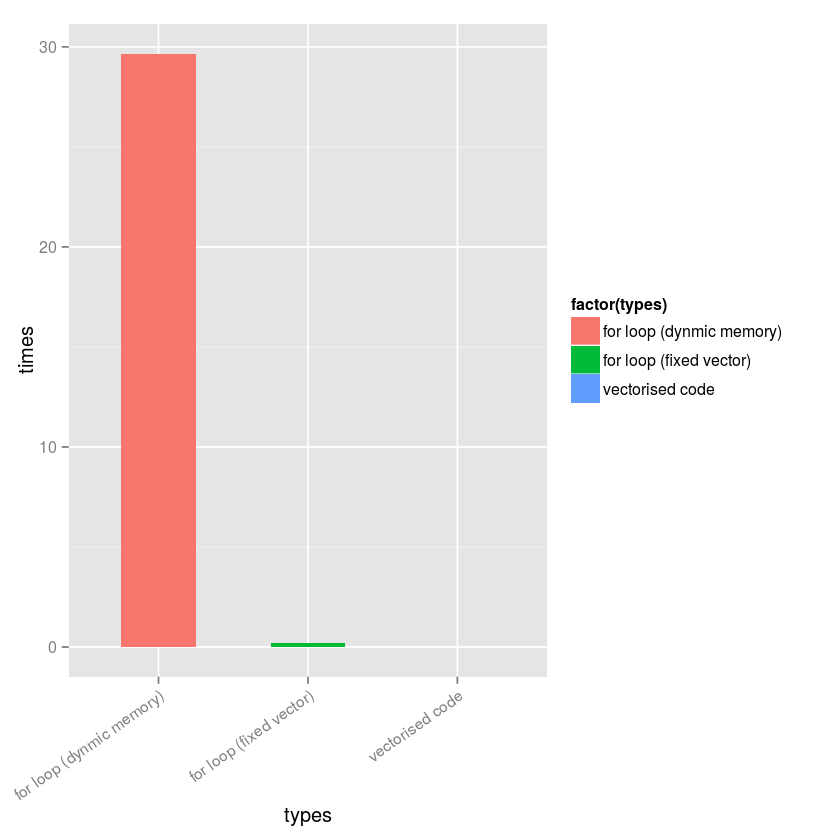

In [48]:
times <- c(time1[3], time2[3], time3[3])
types <- c("for loop (dynmic memory)", "for loop (fixed vector)", "vectorised code")

benchmark <- data.frame(times = times, types = types)
bmplot <- ggplot2::ggplot(benchmark, ggplot2::aes(x = types, y = times, fill = factor(types))) + 
            ggplot2::geom_bar(stat = "identity", width=.5) +
            ggplot2::theme(axis.text.x = ggplot2::element_text(angle = 35, hjust = 1))

bmplot

Warning message:
: Stacking not well defined when ymin != 0

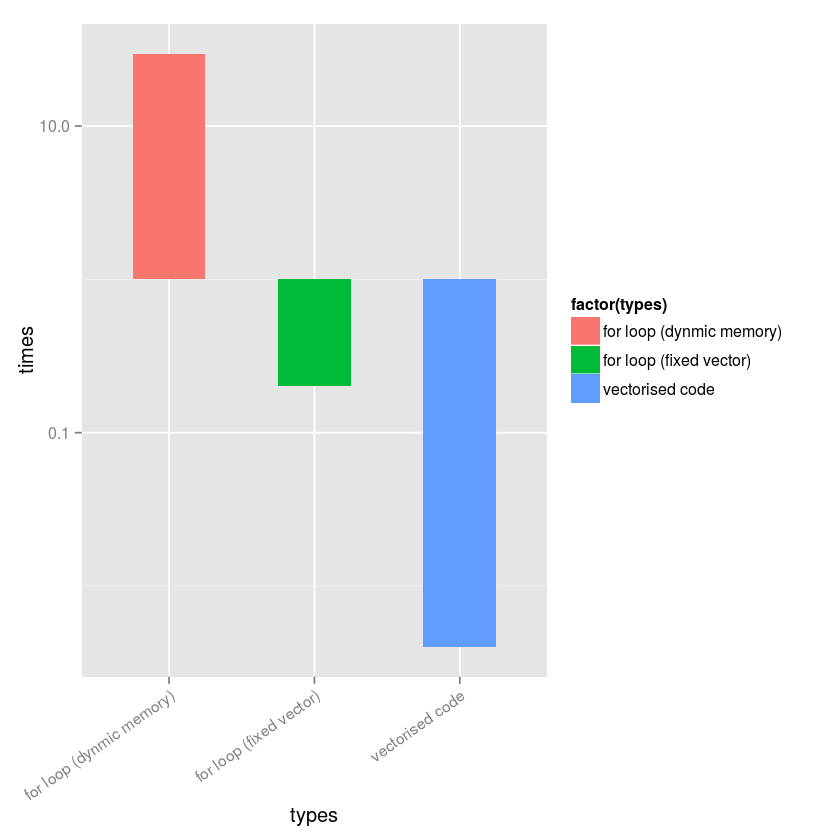

In [49]:
bmplot <- bmplot + ggplot2::scale_y_log10()
print(bmplot)

In [1]:
benchmark

ERROR: Error in eval(expr, envir, enclos): object 'benchmark' not found


# Hands-on R: DataFrames

In [1]:
library("dplyr");
library(nycflights13)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



## Data Summary

In [60]:
head(flights)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
3,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
4,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
5,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54
6,2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54


In [61]:
tail(flights)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,9,30,NA,NA,NA,NA,EV,N740EV,5274,LGA,BNA,NA,764,NA,NA
2,2013,9,30,NA,NA,NA,NA,9E,,3393,JFK,DCA,NA,213,NA,NA
3,2013,9,30,NA,NA,NA,NA,9E,,3525,LGA,SYR,NA,198,NA,NA
4,2013,9,30,NA,NA,NA,NA,MQ,N535MQ,3461,LGA,BNA,NA,764,NA,NA
5,2013,9,30,NA,NA,NA,NA,MQ,N511MQ,3572,LGA,CLE,NA,419,NA,NA
6,2013,9,30,NA,NA,NA,NA,MQ,N839MQ,3531,LGA,RDU,NA,431,NA,NA


In [62]:
summary(flights)

      year          month             day           dep_time   
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 907  
 Median :2013   Median : 7.000   Median :16.00   Median :1401  
 Mean   :2013   Mean   : 6.549   Mean   :15.71   Mean   :1349  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400  
                                                 NA's   :8255  
   dep_delay          arr_time      arr_delay          carrier         
 Min.   : -43.00   Min.   :   1   Min.   : -86.000   Length:336776     
 1st Qu.:  -5.00   1st Qu.:1104   1st Qu.: -17.000   Class :character  
 Median :  -2.00   Median :1535   Median :  -5.000   Mode  :character  
 Mean   :  12.64   Mean   :1502   Mean   :   6.895                     
 3rd Qu.:  11.00   3rd Qu.:1940   3rd Qu.:  14.000                     
 Max.   :1301.00   Max.   :2400   Max.   :1272.000      

In [67]:
YaleToolkit::whatis(head(flights, n=10))

,variable.name,type,missing,distinct.values,precision,min,max
1,year,numeric,0,1,1,2013,2013
2,month,numeric,0,1,1,1,1
3,day,numeric,0,1,1,1,1
4,dep_time,numeric,0,8,1,517,558
5,dep_delay,numeric,0,8,1,-6,4
6,arr_time,numeric,0,10,1,709,1004
7,arr_delay,numeric,0,10,1,-25,33
8,carrier,character,0,5,NA,"c(""UA"", ""UA"", ""AA"", ""B6"", ""DL"", ""UA"", ""B6"", ""EV"", ""B6"", ""AA"")","c(""UA"", ""UA"", ""AA"", ""B6"", ""DL"", ""UA"", ""B6"", ""EV"", ""B6"", ""AA"")"
9,tailnum,character,0,10,NA,"c(""N14228"", ""N24211"", ""N619AA"", ""N804JB"", ""N668DN"", ""N39463"", ""N516JB"", ""N829AS"", ""N593JB"", ""N3ALAA"")","c(""N14228"", ""N24211"", ""N619AA"", ""N804JB"", ""N668DN"", ""N39463"", ""N516JB"", ""N829AS"", ""N593JB"", ""N3ALAA"")"
10,flight,numeric,0,10,1,79,5708


## Projection

In [3]:
head(flights %>% select(month, year))

,month,year
1,1,2013
2,1,2013
3,1,2013
4,1,2013
5,1,2013
6,1,2013


In [4]:
head(subset(flights, , select = c(month, year)))

,month,year
1,1,2013
2,1,2013
3,1,2013
4,1,2013
5,1,2013
6,1,2013


## Selection

In [84]:
flights[1:2, ]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33


In [80]:
flights[c(T, rep(F, nrow(flights))), ]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17


In [81]:
nrow(flights[c(T, F), ])

[1] 168388

In [82]:
flight_subset1 <- subset(flights, month >= 3 & month <=6)
head(flight_subset1)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,3,1,4,125,318,142,B6,N706JB,11,JFK,FLL,166,1069,0,4
2,2013,3,1,50,52,526,48,B6,N794JB,707,JFK,SJU,198,1598,0,50
3,2013,3,1,117,152,223,149,B6,N328JB,608,JFK,PWM,48,273,1,17
4,2013,3,1,454,-6,633,-15,US,N177US,1117,EWR,CLT,79,529,4,54
5,2013,3,1,505,-10,746,-24,UA,N527UA,475,EWR,IAH,199,1400,5,5
6,2013,3,1,521,-9,813,-14,UA,N76523,1714,LGA,IAH,213,1416,5,21


`dplyr` instead provides the `filter()` function. Combined with the pipe operator `%>%`, it can result in very readable code, particularly when one has to chain operations.

In [74]:
flight_subset2 <- flights %>% filter(month >= 3 & month <= 6)
head(flight_subset2)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,3,1,4,125,318,142,B6,N706JB,11,JFK,FLL,166,1069,0,4
2,2013,3,1,50,52,526,48,B6,N794JB,707,JFK,SJU,198,1598,0,50
3,2013,3,1,117,152,223,149,B6,N328JB,608,JFK,PWM,48,273,1,17
4,2013,3,1,454,-6,633,-15,US,N177US,1117,EWR,CLT,79,529,4,54
5,2013,3,1,505,-10,746,-24,UA,N527UA,475,EWR,IAH,199,1400,5,5
6,2013,3,1,521,-9,813,-14,UA,N76523,1714,LGA,IAH,213,1416,5,21


## Rename

The rename operation is used to simply rename a column of your dataframe keeping the content intact.

In [3]:
head(flights %>% rename(TheMonth = month))

,year,TheMonth,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
3,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
4,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
5,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54
6,2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54


## Group By

In [5]:
flights %>% 
    group_by(day) %>% 
    summarise(dep_time_mean=mean(dep_time, na.rm = TRUE))

,day,dep_time_mean
1,1,1351.646
2,2,1344.922
3,3,1363.015
4,4,1341.605
5,5,1343.205
6,6,1345.816
7,7,1348.325
8,8,1341.929
9,9,1362.062
10,10,1349.109


## Union

In [6]:
df_1 = filter(flights, dep_time == 517);
df_2 = filter(flights, dep_time == 518);
bind_rows(df_1, df_2);

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,10,20,517,-3,754,-9,UA,N78509,1096,EWR,IAH,200,1400,5,17
3,2013,11,2,517,2,806,11,UA,N536UA,598,EWR,IAH,201,1400,5,17
4,2013,11,10,517,2,749,-17,UA,N487UA,817,EWR,IAH,196,1400,5,17
5,2013,12,6,517,2,813,-1,UA,N18220,1012,EWR,IAH,209,1400,5,17
6,2013,12,11,517,2,825,11,UA,N77295,1014,EWR,IAH,228,1400,5,17
7,2013,12,29,517,17,712,21,US,N460UW,1895,EWR,CLT,92,529,5,17
8,2013,2,24,517,2,816,5,UA,N15712,1545,EWR,IAH,217,1400,5,17
9,2013,1,15,518,-7,825,5,UA,N37277,1018,EWR,IAH,229,1400,5,18
10,2013,1,24,518,-7,749,-31,UA,N18223,1018,EWR,IAH,193,1400,5,18


## Difference

In [7]:
set_a = filter(flights, dep_time == 517 | dep_time == 518);
set_b = filter(flights, dep_time == 518 | dep_time == 519);
set_a %>% setdiff(set_b)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,10,20,517,-3,754,-9,UA,N78509,1096,EWR,IAH,200,1400,5,17
3,2013,11,2,517,2,806,11,UA,N536UA,598,EWR,IAH,201,1400,5,17
4,2013,11,10,517,2,749,-17,UA,N487UA,817,EWR,IAH,196,1400,5,17
5,2013,12,6,517,2,813,-1,UA,N18220,1012,EWR,IAH,209,1400,5,17
6,2013,12,11,517,2,825,11,UA,N77295,1014,EWR,IAH,228,1400,5,17
7,2013,12,29,517,17,712,21,US,N460UW,1895,EWR,CLT,92,529,5,17
8,2013,2,24,517,2,816,5,UA,N15712,1545,EWR,IAH,217,1400,5,17


## Cartesian Product

In [9]:
df_1 = data.frame(
    name=c('Jack', 'Mario', 'Luigi'),
    stringsAsFactors=FALSE)

df_2 = data.frame(
    surname=c('Rossi', 'Verdi', 'Reacher'), 
    stringsAsFactors=FALSE)

df_1$tmp = NA
df_2$tmp = NA

full_join(df_1, df_2, by="tmp") %>% select(-tmp)

,name,surname
1,Jack,Rossi
2,Jack,Verdi
3,Jack,Reacher
4,Mario,Rossi
5,Mario,Verdi
6,Mario,Reacher
7,Luigi,Rossi
8,Luigi,Verdi
9,Luigi,Reacher


## Natural Join

A NATURAL JOIN is a JOIN operation that creates an implicit join clause for you based on the common columns in the two tables being joined. Common columns are columns that have the same name in both tables. A NATURAL JOIN can be 

* an INNER join, 
* a LEFT OUTER join, or 
* a RIGHT OUTER join.

The default is INNER join.

In [11]:
df_1 = data.frame(
    name=c('Jack', 'Mario', 'Luigi'),
    department_id=c(30, 31, 31),
    stringsAsFactors=FALSE)

df_2 = data.frame(
    department_name=c('Sales', 'Product', 'Finance'), 
    department_id=c(30, 31, 32),
    stringsAsFactors=FALSE)

full_join(df_1, df_2, by="department_id")

,name,department_id,department_name
1,Jack,30,Sales
2,Mario,31,Product
3,Luigi,31,Product
4,NA,32,Finance


# Comparison between R and Python

```python
import numpy as np
```


### Data Summary

| Python            | R                       |
|-------------------|-------------------------|
|`df.head()`     |`head(df)`            |
|`df.tail()`     |`tail(df)`            |
|`df.describe()` |`summary(df)`         |

### Selection

| Python            | R                                       |
|-------------------|-----------------------------------------|
|`df[bool expr with element-wise operators]`     |`df %>% filter(bool expr)` |
|`df.query('bool expr')`     | |

```python
# Simple filtering
flights[flights.month <= 3]

# Filtering with element-wise operators
flights[(flights.month >= 3) & (flights.month <= 6)]

# with numexpr
flights.query('month >= 3 & month <= 6')
```

### Projection

| Python            | R                                       |
|-------------------|-----------------------------------------|
|`df[['col_1', 'col_2']]`     |`df %>% select(col_1, col_2)` |

```python
flights[['year', 'month']]
```

### Rename

| Python            | R                                       |
|-------------------|-----------------------------------------|
|`df.rename(columns={'col_name': 'col_new_name'})`     |`df %>% rename(col_new_name = col_name)` |

```python
flights.rename(columns={'month': 'TheMonth'})
```

### Union

| Python            | R                                       |
|-------------------|-----------------------------------------|
|`concat([df_1, df_2]);`     |`bind_rows(df_1, df_2)` |

```python
df_1 = flights.query('dep_time == 518')
df_2 = flights.query('dep_time == 517')
concat([df_1, df_2])
```

### Difference

| Python            | R                                       |
|-------------------|-----------------------------------------|
|`set_a[~set_a.column.isin(set_b.column)]`     |`set_a %>% setdiff(set_b)` |

```python
set_a = flights.query('dep_time == 517 | dep_time == 518')
set_b = flights.query('dep_time == 518 | dep_time == 519')

selection = ~set_a.dep_time.isin(set_b.dep_time)
set_a[selection]
```

### Cartesian Product

| Python            | R                                       |
|-------------------|-----------------------------------------|
|`merge(...) with tmp column`     |`full_join(...) with tmp column` |

```python
df_1 = DataFrame({
        'name': ['Jack', 'Mario', 'Luigi']
    });
df_2 = DataFrame({
        'surname': ['Rossi', 'Verdi', 'Reacher']
    })

df_1['tmp'] = np.nan
df_2['tmp'] = np.nan

merge(df_1, df_2, on='tmp').drop('tmp', axis=1)
```

### Full Join

| Python            | R                                       |
|-------------------|-----------------------------------------|
|`merge(..., on="key", how="outer")`     |`full_join(..., by="key")` |

```python
df_1 = DataFrame({
        'name': ['Jack', 'Mario', 'Luigi'],
        'department_id' : [30, 31, 31]
    })
df_2 = DataFrame({
        'department_name': ['Sales', 'Product', 'Finance'],
        'department_id' : [30, 31, 32]
    })

merge(df_1, df_2, on="department_id", how="outer")
```

### Aggregation

```python
flights.dep_time.mean()
flights.dep_time.median()
flights.dep_time.std()
flights.dep_time.var()
flights.dep_time.min()
flights.dep_time.max()
flights.dep_time.mean()
```

### Group By

| Python            | R                                       |
|-------------------|-----------------------------------------|
|`df.groupby('<column>')`    |`df %>% group_by(<column>)` |

```python
flights.groupby('day').dep_time.mean()
```